In [89]:
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import os
from matplotlib import pyplot as plt
import upsetplot as usp

In [92]:
# OpenAPS_NS, OPENonOH_NS
# OPENonOH_AAPS_Uploader, OPENonOH_NS
in_dir = "/home/reinhold/Daten/OPEN/"

in_files = "duplicates_person_id_OPENonOH_AAPS_Uploader_OPENonOH.csv", "duplicates_person_id_OpenAPS_NS_OPENonOH.csv", \
    "duplicates_person_id_OpenAPS_NS_OPENonOH_AAPS_Uploader.csv"
#in_files = "duplicates_merged_all_OPENonOH_AAPS_Uploader_OPENonOH.csv", "duplicates_merged_all_OpenAPS_NS_OPENonOH.csv", \
#    "duplicates_merged_all_OpenAPS_NS_OPENonOH_AAPS_Uploader.csv"
# var = "date"  
var = "id"
# out_image_name = "duplicate_days.png" 
out_image_name = "duplicate_persons.png"
# out_img_title = "days in the respective datasets"
out_img_title = "persons in the respective datasets"


In [93]:

df, df_person_count = [],[]

for i, in_file in enumerate(in_files):
    df.append(pd.read_csv(os.path.join(in_dir, in_file), header=0, parse_dates=[1], index_col=0))
    print(df[i])

    out = df[i]
    out.loc[pd.isnull(out["user_id_ds2"]), "dataset"] = 1  # ds1
    out.loc[pd.isnull(out["user_id_ds1"]), "dataset"] = 2  # ds2
    out.loc[~(pd.isnull(out["user_id_ds2"]) | pd.isnull(out["user_id_ds1"])), "dataset"] = 3  # duplicates


    df[i] = df[i][["dataset", var]]
    #df[i]["dataset"] = df[i]["dataset"].astype(int)
    df_person_count.append(df[i].groupby("dataset", as_index=False, dropna=False).agg("count"))
    print(df_person_count[i])



     dataset  user_id_ds1  user_id_ds2   id
312        3    1104400.0    1104400.0    0
819        3    2773391.0    2773391.0    1
1511       3    8352625.0    8352625.0    2
5506       3    8814820.0    8814820.0    3
884        3    9612394.0    9612394.0    4
...      ...          ...          ...  ...
89         2          NaN   37159654.0  106
90         2          NaN   40974871.0  107
91         2          NaN   98062634.0  108
92         2          NaN   54943175.0  109
93         2          NaN   21316466.0  110

[111 rows x 4 columns]
   dataset  id
0        1  54
1        2  40
2        3  17
      dataset  user_id_ds1  user_id_ds2   id
4416        3   14092221.0   20104403.0    0
23657       3   15634563.0   34208593.0    1
8389        3   24448124.0   50641121.0    2
23492       3   27526291.0   77770642.0    3
20714       3   54280576.0    8814820.0    4
...       ...          ...          ...  ...
112         2          NaN   40974871.0  129
113         2          NaN  

In [91]:
df = df_person_count[0]
counts = {"OPENonOH_AAPS_Uploader" : df[df["dataset"]==1][var].values[0], "OPENonOH" : df[df["dataset"]==2][var].values[0]}
counts["duplicates_OPENonOH_AAPS_Uploader_OPENonOH"] = df[df["dataset"]==3][var].values[0]
df = df_person_count[1]
counts["OpenAPS_NS"] = df[df["dataset"]==1][var].astype(int).values[0]
counts["OPENonOH"] = df[df["dataset"]==2][var].astype(int).values[0]
counts["duplicates_OpenAPS_NS_OPENonOH"] = df[df["dataset"]==3][var].astype(int).values[0]
df = df_person_count[2]
counts["OpenAPS_NS"] = df[df["dataset"]==1][var].astype(int).values[0]
counts["OPENonOH_AAPS_Uploader"] = df[df["dataset"]==2][var].astype(int).values[0]
counts["duplicates_OpenAPS_NS_OPENonOH_AAPS_Uploader"] = df[df["dataset"]==3][var].astype(int).values[0]
print(counts)

{'OPENonOH_AAPS_Uploader': 66, 'OPENonOH': 40, 'duplicates_OPENonOH_AAPS_Uploader_OPENonOH': 17, 'OpenAPS_NS': 89, 'duplicates_OpenAPS_NS_OPENonOH': 17, 'duplicates_OpenAPS_NS_OPENonOH_AAPS_Uploader': 5}


In [85]:
data = {"100" : counts["OPENonOH_AAPS_Uploader"], "010" : counts["OPENonOH"], "001" : counts["OpenAPS_NS"], "111" : 0}
data["110"] = counts["duplicates_OPENonOH_AAPS_Uploader_OPENonOH"]
data["101"] = counts["duplicates_OpenAPS_NS_OPENonOH"]
data["011"] = counts["duplicates_OpenAPS_NS_OPENonOH_AAPS_Uploader"]
print(data)


{'100': 66, '010': 40, '001': 89, '111': 0, '110': 17, '101': 17, '011': 5}


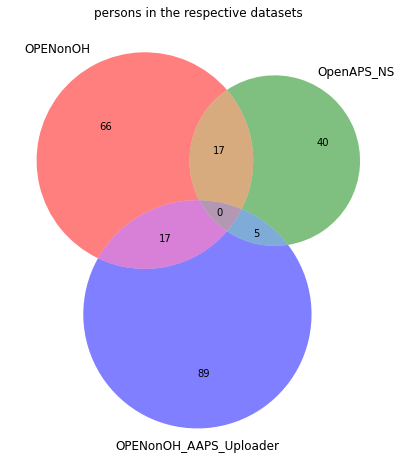

In [86]:
plt.figure(figsize=(8,8))
#venn3(subsets = (data["100"], data["010"], data["110"], data["001"], data["101"], data["011"], data["111"]), set_labels=("OPENonOH", "OpenAPS_NS", "OPENonOH_AAPS_Uploader"), alpha=0.5)
venn3(subsets = (data["100"], data["010"], data["110"], data["001"], data["101"], data["011"], data["111"]), set_labels=("OPENonOH", "OpenAPS_NS", "OPENonOH_AAPS_Uploader"), alpha=0.5)
# venn3((100, 010, 110,001,101,011,111)
plt.title(out_img_title)
plt.savefig(out_image_name)


In [88]:
usp.plot(data)

AttributeError: 'dict' object has no attribute 'ndim'